# Final Project: Big Data in Extreme Environments
## Spring 2021
### Tyler Bull

### 1.1  Setup and Import Relevant Packages
##### Relevant packages include: metpy: for map plotting the data, csv: for reading csv data files, numpy: for calculations, matplotlib: for plotting data, pandas: for handling the data

In [23]:
# Import Relevant Packages
import csv
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import datetime
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from matplotlib.patches import Patch
import matplotlib.animation as animation

import pandas as pd
import os

### 1.2 Import Preliminary Datasets for Preliminary Analysis
##### The population and landmass data will be used for selecting countries that had a change in population density

In [24]:
# Import Population Data
pop = pd.read_csv("Population Data.csv")
area = pd.read_csv("landmass.csv")
area.columns = ['Country','na','na','Area','na','na','na','na','na','na','na','na','na','na','na','na','na','na','na','na']
area = area.drop(columns='na')
area.head()

,Country,Area
0,Afghanistan,647500
1,Albania,28748
2,Algeria,2381740
3,American Samoa,199
4,Andorra,468


### 1.3 Format Data for Use

In [25]:
# Drop Unneeded Columns and NaN Rows
pop = pop.drop(columns = ['Series Name','Series Code']).dropna()
pop.head()

,Country Name,Country Code,2003,2005,2010,2015,2019
0,Aruba,ABW,97017.0,100031.0,101669.0,104341.0,106314.0
1,Afghanistan,AFG,23680871.0,25654277.0,29185507.0,34413603.0,38041754.0
2,Angola,AGO,18121479.0,19433602.0,23356246.0,27884381.0,31825295.0
3,Albania,ALB,3039616.0,3011487.0,2913021.0,2880703.0,2854191.0
4,Andorra,AND,73182.0,78867.0,84449.0,78011.0,77142.0


In [26]:
# Collect list of countries from the MODIS Data and area data
file_list=os.listdir()
file_list = [s.replace("modis_2005_","") for s in file_list]
countries = [s.replace(".csv","") for s in file_list]
countries2 = [s.replace(" ","") for s in area.Country.tolist()]

In [27]:
# Remove Countries not in the MODIS and Area data from the Population data
pop = (pop[pop['Country Name'].isin(countries)])
pop = (pop[pop['Country Name'].isin(countries2)])

# Remove misfit data '..'
pop = (pop[pop['2015'] != '..'])

### 2.1 Perform Initial Calculations from Data
##### Determine countries with the larges percent change in their populations, both positive and negative. Furthermore determine the 5 countries with the least change over the time basis. Not all of these categories have equivalent quantity, as a relitively few countries had low change in population, or a decrease in population of > 8 %.

In [28]:
# Calculate Percent change across time domain
diff = 100*np.divide(pop["2019"].astype('float') - pop["2003"].astype('float'),pop["2019"].astype('float'))
pop["Pct"]= diff
pop["absPct"] = abs(diff)

In [29]:
# Create new dataframes with maximum increase, maximum decrease and minimum change.
# Add the Area Column with Areas of the Countries

### 2.1.1 Find the 10 countries with the highest increase in population from 2000 - 2015

In [30]:
maxPos = pop.nlargest(10,'Pct')
maxPos.columns = ['Country','Code','2003','2005','2010','2015','2019','Pct','Area']
a = maxPos.Country.tolist()
a = [sub + " " for sub in a]
b=[]
for s in a:
    b = np.append(b,area.Area.loc[area.Country == s].values.item())
maxPos.Area = b
maxPos.head(10)

,Country,Code,2003,2005,2010,2015,2019,Pct,Area
198,Qatar,QAT,681788.0,865416.0,1856327.0,2565710.0,2832067.0,75.926135,11437.0
180,Oman,OMN,2386166.0,2511251.0,3041434.0,4267348.0,4974986.0,52.036729,212460.0
125,Kuwait,KWT,2161626.0,2270198.0,2991884.0,3835591.0,4207083.0,48.619364,17820.0
116,Jordan,JOR,5434030.0,5765635.0,7261539.0,9266575.0,10101694.0,46.206745,92300.0
171,Niger,NER,12647984.0,13624467.0,16464025.0,20001663.0,23310715.0,45.741759,1267000.0
245,Uganda,UGA,25980552.0,27684585.0,32428167.0,38225453.0,44269594.0,41.312875,236040.0
227,Chad,TCD,9373916.0,10096633.0,11952136.0,14110975.0,15946876.0,41.217854,1284000.0
14,Burundi,BDI,6909154.0,7364862.0,8675602.0,10160030.0,11530580.0,40.079736,27830.0
78,Gabon,GAB,1319953.0,1390549.0,1624140.0,1947686.0,2172579.0,39.244879,267667.0
156,Mali,MLI,11982695.0,12775516.0,15049353.0,17438778.0,19658031.0,39.044277,1240000.0


### 2.1.2 Find the 7 countries with the highest decrease in population from 2000 - 2015
##### Only 7 selected because the 8th highest country decreased by less than 5%.

In [31]:
maxNeg = pop.nsmallest(7,'Pct')
maxNeg.columns = ['Country','Code','2003','2005','2010','2015','2019','Pct','Area']
maxNeg.head(15)
a = maxNeg.Country.tolist()
a = [sub + " " for sub in a]
b=[]
for s in a:
    b = np.append(b,area.Area.loc[area.Country == s].values.item())
maxNeg.Area = b
maxNeg.head(15)

,Country,Code,2003,2005,2010,2015,2019,Pct,Area
19,Bulgaria,BGR,7775327.0,7658972.0,7395599.0,7177991.0,6975761.0,-11.462061,110910.0
199,Romania,ROU,21574326.0,21319685.0,20246871.0,19815616.0,19356544.0,-11.457531,237500.0
148,Moldova,MDA,2902320.0,2888111.0,2861487.0,2834530.0,2657637.0,-9.206788,33843.0
246,Ukraine,UKR,47812949.0,47105171.0,45870741.0,45154036.0,44385155.0,-7.722839,603700.0
212,Serbia,SRB,7480591.0,7440769.0,7291436.0,7095383.0,6944975.0,-7.712281,88361.0
80,Georgia,GEO,3951736.0,3902469.0,3786695.0,3725276.0,3720382.0,-6.218555,69700.0
97,Croatia,HRV,4303399.0,4310145.0,4295427.0,4203604.0,4067500.0,-5.799607,56542.0


### 2.1.3 Find the 5 countries with the least change in population from 2000 - 2015
##### Only 5 selected because the 6th country changed by greater than 2%

In [32]:
minChg = pop
minChg.columns = ['Country','Code','2003','2005','2010','2015','2019','Pct','Area']
minChg.head(15)
a = minChg.Country.tolist()
a = [sub + " " for sub in a]
b=[]
for s in a:
    b = np.append(b,area.Area.loc[area.Country == s].values.item())
minChg.Area = b
minChg.head(15)

,Country,Code,2003,2005,2010,2015,2019,Pct,Area
7,Argentina,ARG,38087868.0,38892931.0,40788453.0,43131966.0,44938712.0,15.244861,2766890.0
8,Armenia,ARM,3017932.0,2981269.0,2877319.0,2925553.0,2957731.0,-2.035378,29800.0
11,Australia,AUS,19895400.0,20394800.0,22031750.0,23815995.0,25364307.0,21.561429,7686850.0
12,Austria,AUT,8121423.0,8227829.0,8363404.0,8642699.0,8877067.0,8.512316,83870.0
13,Azerbaijan,AZE,8234100.0,8391850.0,9054332.0,9649341.0,10023318.0,17.850556,86600.0
14,Burundi,BDI,6909154.0,7364862.0,8675602.0,10160030.0,11530580.0,40.079736,27830.0
15,Belgium,BEL,10376133.0,10478617.0,10895586.0,11274196.0,11484055.0,9.647481,30528.0
16,Benin,BEN,7520555.0,7982225.0,9199259.0,10575952.0,11801151.0,36.272699,112620.0
18,Bangladesh,BGD,134791603.0,139035505.0,147575430.0,156256276.0,163046161.0,17.329177,144000.0
19,Bulgaria,BGR,7775327.0,7658972.0,7395599.0,7177991.0,6975761.0,-11.462061,110910.0


### 3.1 Import Fire Data of the Selected Countries for All Years
##### First step of importing the relevant datasets for analysis from the fire data. A few functions are created to assist in handling the datasets.

In [33]:
# Extracting the list of countries for import
maxPosList = maxPos['Country'].tolist()
maxNegList = maxNeg['Country'].tolist()
minChgList = minChg['Country'].tolist()

In [34]:
def import_fire_data(list):
    for m in list:
        for n in [2003, 2005, 2010, 2015, 2019]:
            filename = 'modis_'+str(n)+'_'+str(m)+".csv"
            globals()[str(m)+str(n)] = pd.read_csv(str(filename))
            globals()[str(m)+str(n)] = globals()[str(m)+str(n)].drop(columns = ['scan','track','instrument','satellite','version','frp','type','daynight']).dropna()

In [35]:
# use the functions to import the data
import_fire_data(maxPosList)
import_fire_data(maxNegList)
import_fire_data(minChgList)

### 3.2 Examine basic size and shape of the datasets
##### Total Countries: 22, Total Datapoints in Population Data: 132, Total Datapoints in Fire Data [7 x n shape]: 719460
##### Relevant variables: Area, Population, Latitude, Longitude, Acquisition Date, Acquisition Time, Confidence, Brightness

In [36]:
# A function which will be used frequently, loops through all years and countries associated with the
# lists: maxPosList, maxNegList, minChgList to do various operations on these sets. 
# Walking function is redfined as needed in this case, it calulates length
def walkingFunction(m,n,dataset):
    return 

def loopAllSets(list1,emptyarray):
    for m in list1:
        for n in [2003, 2005, 2010, 2015, 2019]:
            emptyarray = np.vstack([emptyarray,walkingFunction(m,n,globals()[str(m)+str(n)])])
    data = np.delete(emptyarray,0,0)
    return data

In [37]:
# show header information of one of the datasets, these are the columns that will be considered.
Japan2005.head()

,latitude,longitude,brightness,acq_date,acq_time,confidence,bright_t31
0,35.3498,139.8745,300.3,2005-01-01,114,0,282.5
1,35.0327,136.8793,304.7,2005-01-02,157,30,282.7
2,35.3514,139.8793,300.3,2005-01-02,157,0,282.9
3,33.2651,131.6504,305.5,2005-01-02,158,0,285.0
4,35.0239,136.8740,300.4,2005-01-02,332,0,283.8


In [38]:
# define the walking function as a length calculation
def walkingFunction(m,n,dataset):
    return np.array([m, n, len(dataset)])


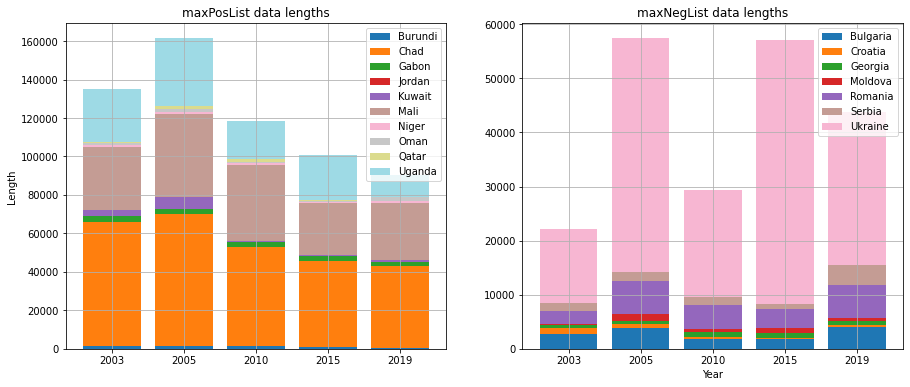

In [41]:
# Create stacked plots of the lengths for each dataset
count = -1
totalLength = 0
fig, axs = plt.subplots(1,2,figsize = (15,6))
for listname in ['maxPosList','maxNegList']:
    colors = iter(cm.tab20(np.linspace(0,1,10)))
    count = count +1
    # caclulate lengths of all the datasets and the total length of the data
    lengthData = loopAllSets(eval(listname),np.array([1,1,1]))
    totalLength = totalLength + lengthData[:,2].astype('float').sum()
    countries = np.unique(lengthData[:,0])
    A = np.array([0,0,0,0,0])
    B = np.array([0,0,0,0,0])
    axs[count].title.set_text(listname+' data lengths')
    axs[0].set_ylabel('Length')
    axs[1].set_xlabel('Year')
    axs[count].grid()
    handles = []
    labels = []
    for intg in countries:
        B = A+B
        dat = lengthData[lengthData[:,0] == intg]
        col = next(colors)
        A = dat[:,2].astype('float')
        l1 = axs[count].bar(dat[:,1],A,color=col,bottom = B)
        handles.append(Patch(facecolor = col))
        labels.append(intg)
    axs[count].legend(handles,labels,loc='upper right')

In [21]:
# Determine the total length of all the data considered 
totalLength

15113806.0

In [44]:
# Remove low confidence fires (less that 10) and fix the row index column
def walkingFunction(m,n,dataset):
    globals()[str(m)+str(n)] = globals()[str(m)+str(n)][globals()[str(m)+str(n)]['confidence'] >= 10]
    globals()[str(m)+str(n)] = globals()[str(m)+str(n)].reset_index()
    globals()[str(m)+str(n)] = globals()[str(m)+str(n)].drop(['index'], axis=1)
    return np.array([m, n, len(dataset)])

loopAllSets(maxPosList,np.array([1,1,1]))
loopAllSets(maxNegList,np.array([1,1,1]))
loopAllSets(minChgList,np.array([1,1,1]))

# Function to square up the bounding boxes for square maps
def bboxSquare(m, n):
    for n in [2003, 2005, 2010, 2015, 2019]:
        minlat = globals()[str(m)+str(n)].latitude.min()
        maxlat = globals()[str(m)+str(n)].latitude.max()
        minlon = globals()[str(m)+str(n)].longitude.min()
        maxlon = globals()[str(m)+str(n)].longitude.max()
        latrng = np.ptp([minlat,maxlat])
        lonrng = np.ptp([minlon,maxlon])
        dim = max([latrng,lonrng])
        midlon = minlon + lonrng/2
        midlat = minlat + latrng/2
        minlat = midlat - dim/2
        maxlat = midlat + dim/2
        minlon = midlon - dim/2
        maxlon = midlon + dim/2
        BBox = [minlon,maxlon,minlat,maxlat]
        return BBox,dim


### 3.3 Generate plots of the fire data for each country over the years

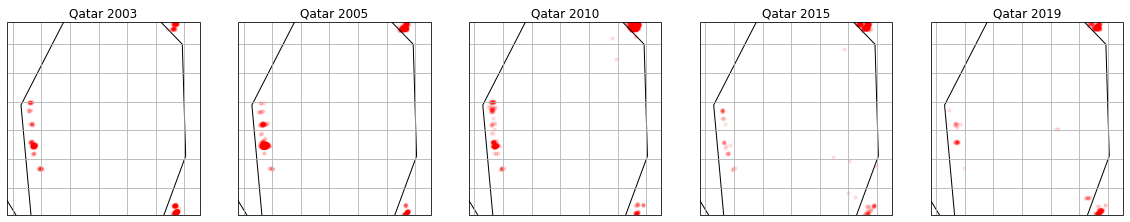

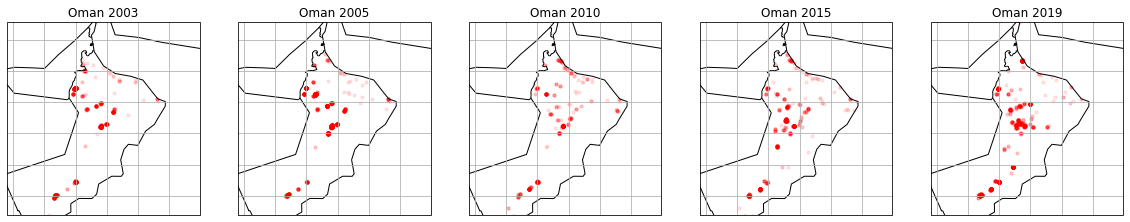

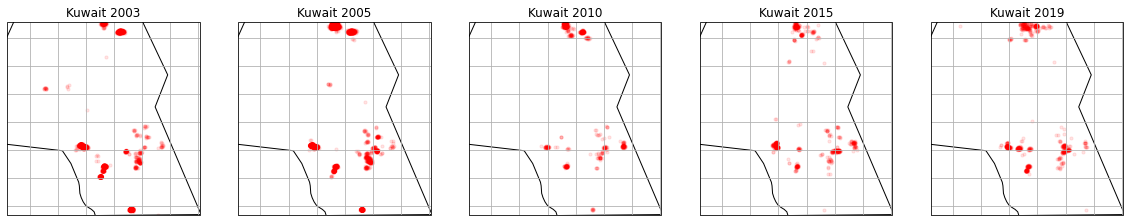

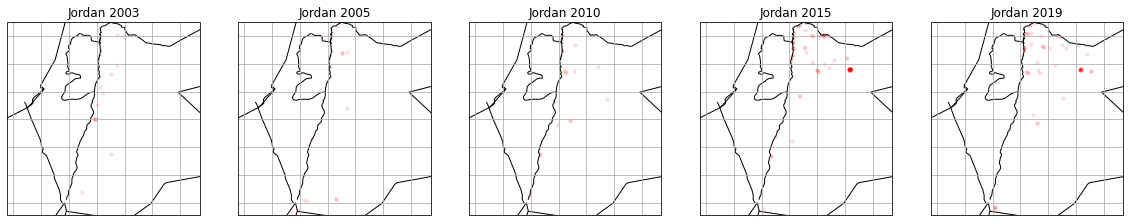

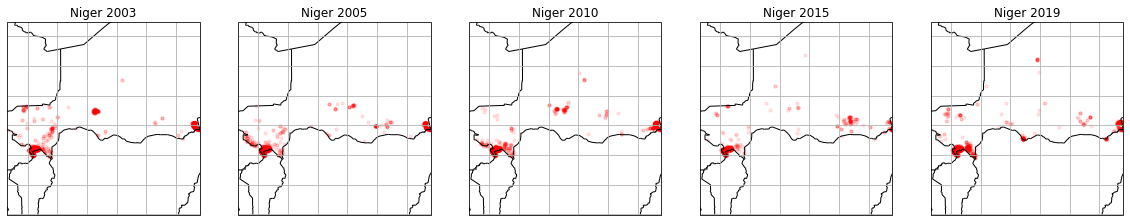

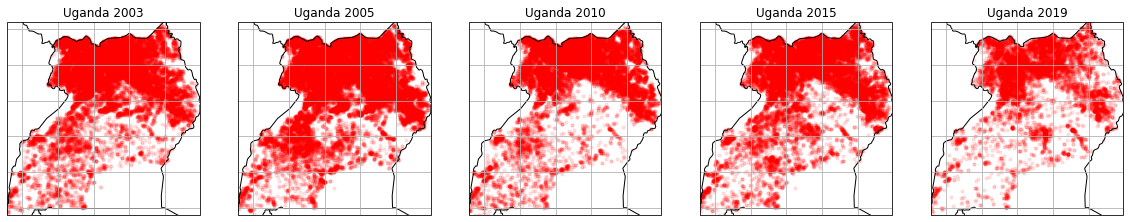

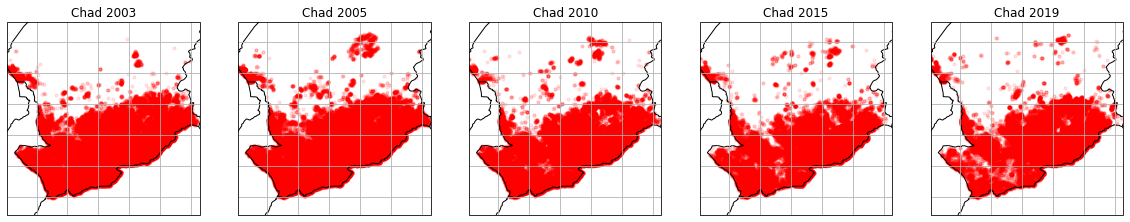

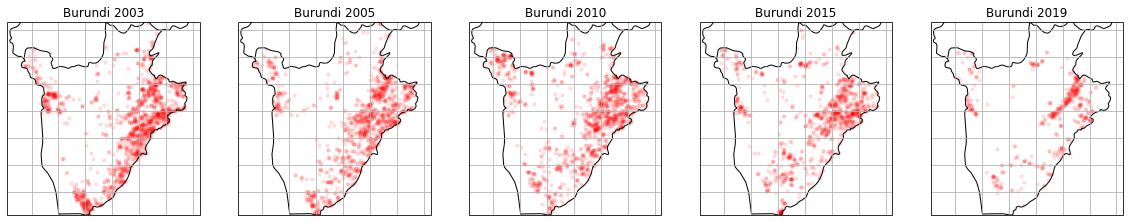

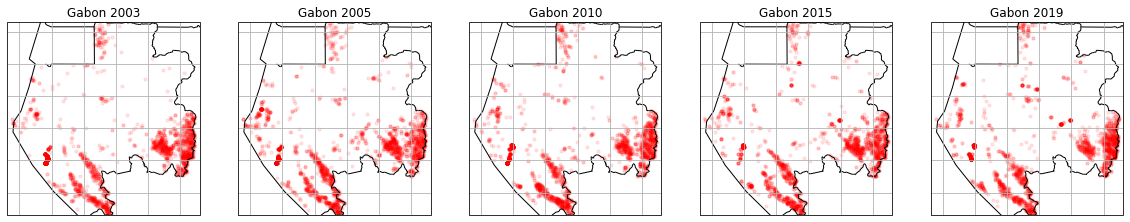

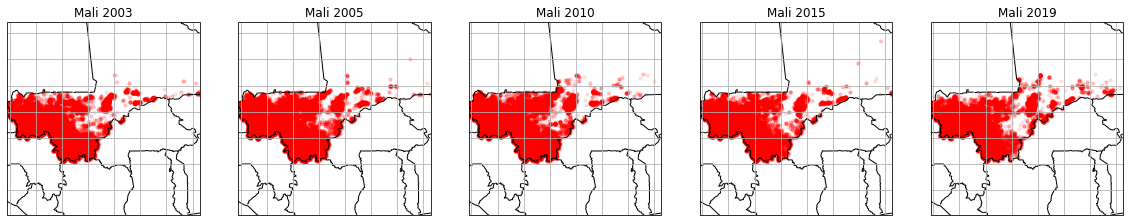

In [49]:
for m in maxPosList:
    fig,axs = plt.subplots(1,5, subplot_kw={'projection': ccrs.PlateCarree()},figsize=(20,8))
    index = 0
    axs=axs.flatten()
    for n in [2003, 2005, 2010, 2015, 2019]:
        BBox,dim = bboxSquare(m,n)
        axs[index].set_extent(BBox, crs=ccrs.PlateCarree())
        axs[index].add_feature(cfeature.BORDERS, edgecolor="black")
        axs[index].coastlines(resolution='110m', color='black')
        axs[index].gridlines()
        axs[index].set_title(str(m)+" "+str(n))
        axs[index].scatter(globals()[str(m)+str(n)].longitude, globals()[str(m)+str(n)].latitude,
            color='red', marker='o',
            transform=ccrs.PlateCarree(),
            s = 10, alpha = 0.1)
       
        index = index + 1


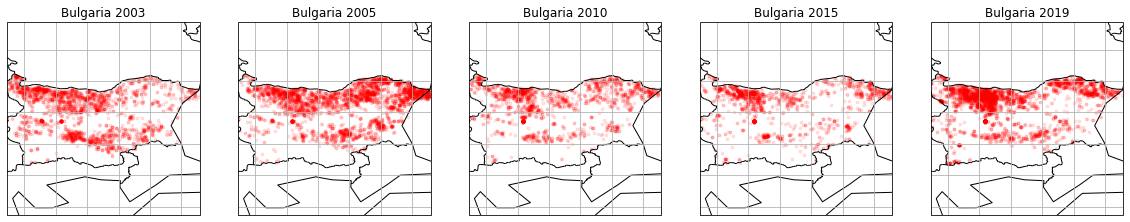

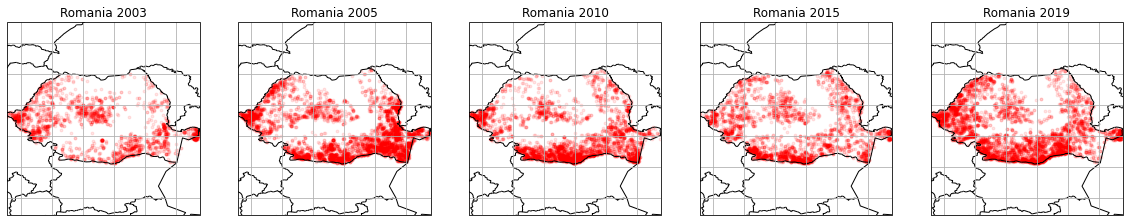

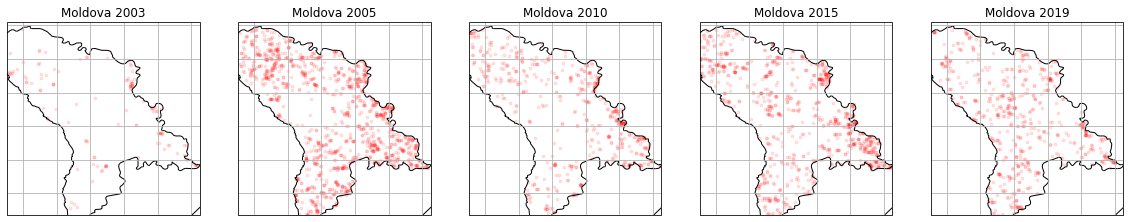

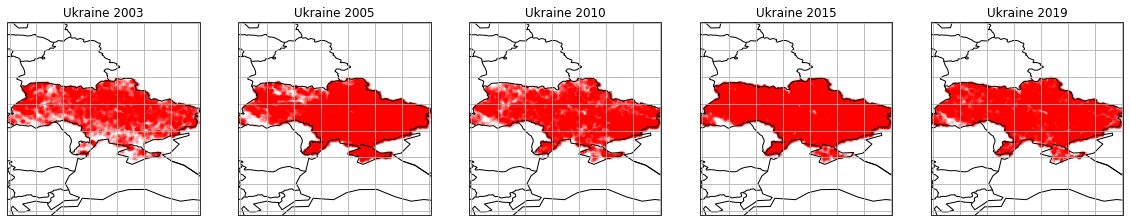

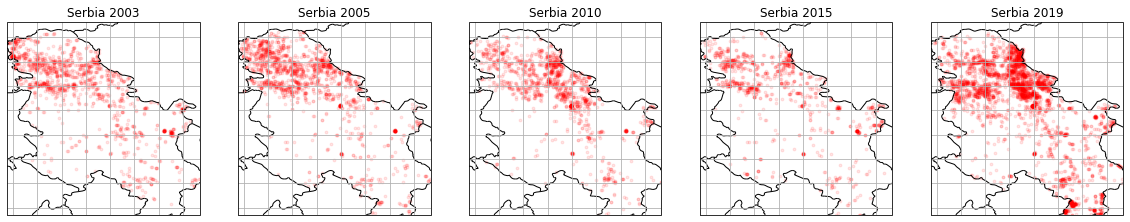

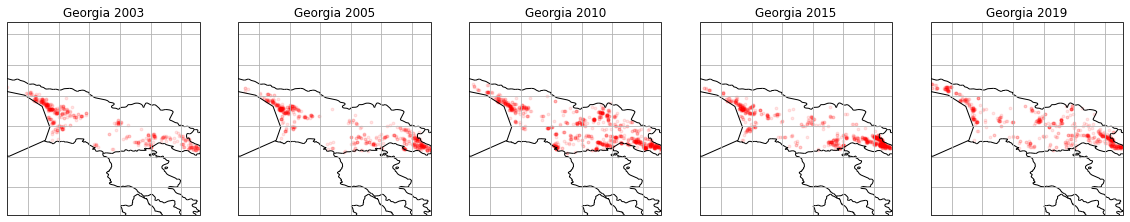

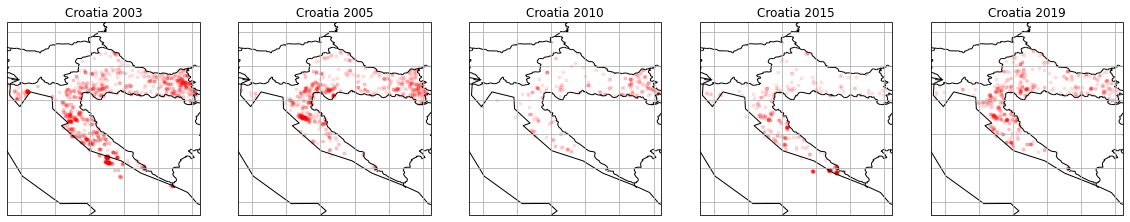

In [48]:
for m in maxNegList:
    fig,axs = plt.subplots(1,5, subplot_kw={'projection': ccrs.PlateCarree()},figsize=(20,8))
    index = 0
    axs=axs.flatten()
    for n in [2003, 2005, 2010, 2015, 2019]:
        BBox,dim = bboxSquare(m,n)
        axs[index].set_extent(BBox, crs=ccrs.PlateCarree())
        axs[index].add_feature(cfeature.BORDERS, edgecolor="black")
        axs[index].coastlines(resolution='110m', color='black')
        axs[index].gridlines()
        axs[index].set_title(str(m)+" "+str(n))
        axs[index].scatter(globals()[str(m)+str(n)].longitude, globals()[str(m)+str(n)].latitude,
            color='red', marker='o',
            transform=ccrs.PlateCarree(),
            s = 8, alpha = 0.1)
        index = index + 1


### 3.4 Analyze Regressions Across the Significant Countries

In [53]:
# Redefine loop all sets for use
def loopAllSets(list1,emptyarray):
    for m in list1:
        df = walkingFunction(m)
        emptyarray=emptyarray.append(df)
    return emptyarray

In [54]:
# Walking function for use in restructuring the data and counting the number of fires.
def walkingFunction(m):
    dat1 = len(globals()[str(m)+str(2003)])
    dat2 = len(globals()[str(m)+str(2005)])
    dat3 = len(globals()[str(m)+str(2010)])
    dat4 = len(globals()[str(m)+str(2015)])
    dat5 = len(globals()[str(m)+str(2019)])
    d = {'Country': [str(m)], '2003': dat1, '2005': dat2, '2010': dat3, '2015': dat4, '2019': dat5}
    df = pd.DataFrame(data=d)
    return df

emptyDF = pd.DataFrame(columns = ["Country",'2003','2005','2010','2015','2019'])
maxPosFires = loopAllSets(maxPosList,emptyDF)
maxNegFires = loopAllSets(maxNegList,emptyDF)
minChgFires = loopAllSets(minChgList,emptyDF)

In [55]:
maxPosFires = maxPosFires.set_index('Country').T
maxPosFires.head(20)

Country,Qatar,Oman,Kuwait,Jordan,Niger,Uganda,Chad,Burundi,Gabon,Mali
2003,574,1132,3359,15,1103,27365,64354,1531,2758,32375
2005,1255,1563,6135,13,1043,35208,68544,1225,2764,43010
2010,1664,452,630,17,1111,19611,51562,1311,2445,39311
2015,440,734,592,80,656,22954,44725,1031,2197,26717
2019,417,1585,792,52,1189,11331,42365,480,2278,29611


In [56]:
maxNegFires = maxNegFires.set_index('Country').T
maxNegFires.head(10)

Country,Bulgaria,Romania,Moldova,Ukraine,Serbia,Georgia,Croatia
2003,2648,2382,123,13331,1428,505,1211
2005,3813,6042,1222,42851,1602,612,707
2010,1874,4406,548,19533,1397,996,202
2015,1716,3467,893,48307,973,810,336
2019,3902,5951,612,27873,3655,676,523


In [57]:
minChgFires = minChgFires.set_index('Country').T
minChgFires.head(10)

Country,Argentina,Armenia,Australia,Austria,Azerbaijan,Burundi,Belgium,Benin,Bangladesh,Bulgaria,...,Tanzania,Uganda,Ukraine,Uruguay,Uzbekistan,Vietnam,Vanuatu,Samoa,Zambia,Zimbabwe
2003,115816,63,210326,639,1607,1531,685,25175,2894,2648,...,120347,27365,13331,1829,7131,19323,362,38,202775,20078
2005,70552,218,188172,615,1199,1225,575,26528,3698,3813,...,109583,35208,42851,1194,8629,22784,246,28,215610,29669
2010,62274,935,119511,568,1774,1311,375,20379,2796,1874,...,111189,19611,19533,1607,1862,25650,467,21,217042,33716
2015,44679,216,237302,580,2579,1031,472,14766,1547,1716,...,91379,22954,48307,1986,1943,22465,679,20,218948,26466
2019,49912,381,307032,519,2150,480,599,11247,2675,3902,...,74014,11331,27873,1159,2874,18362,256,20,204464,24287


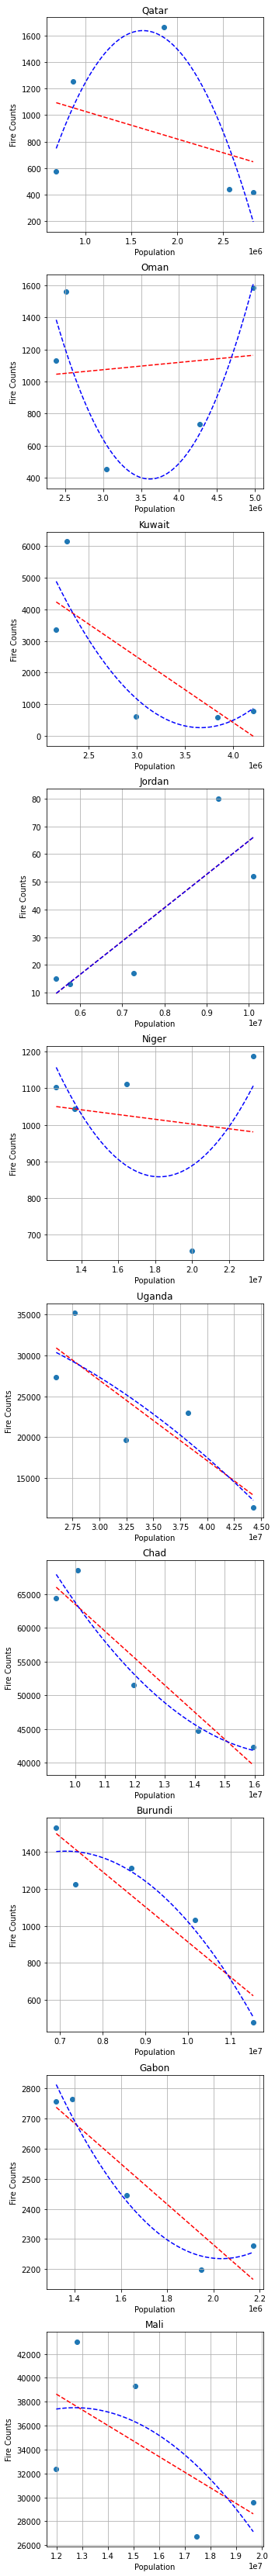

In [84]:
# Loop through all data and perform 1st and 2nd order regression analysis across the years.
# Plot the results 
fig,axs = plt.subplots(len(maxPosFires.iloc[1]),1,figsize=(5,60)) 
index = 0
for j in range(len(maxPosFires.iloc[1])):
    axs[index].scatter(maxPos.iloc[index,2:7].T,maxPosFires.iloc[:,index])
    axs[index].grid()
    axs[index].set_title(maxPosFires.iloc[:,index].name)
    axs[index].set_ylabel('Fire Counts')
    axs[index].set_xlabel('Population')
    z = np.polyfit(maxPos.iloc[index,2:7].astype('int').T,maxPosFires.iloc[:,index].astype('int'), 1)
    z2 = np.polyfit(maxPos.iloc[index,2:7].astype('int').T,maxPosFires.iloc[:,index].astype('int'), 2)

    p = np.poly1d(z)
    p2 = np.poly1d(z2)
    x1 = maxPos.iloc[index,2:7].astype('int').T
    x = np.arange(min(x1),max(x1),1000, dtype=float)
    axs[index].plot(x,p(x),"r--")
    axs[index].plot(x,p2(x),"b--")
    index = index+1

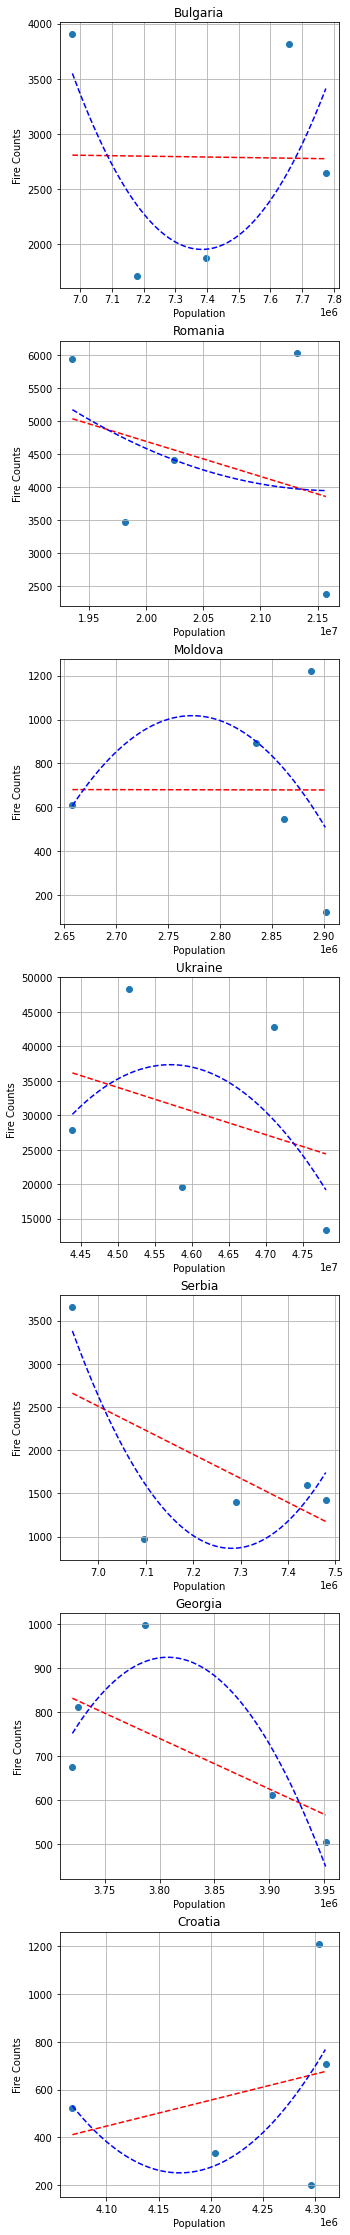

In [83]:
fig,axs = plt.subplots(len(maxNegFires.iloc[1]),1,figsize=(5,40)) 
index = 0
for j in range(len(maxNegFires.iloc[1])):
    axs[index].scatter(maxNeg.iloc[index,2:7].T,maxNegFires.iloc[:,index])
    axs[index].grid()
    axs[index].set_title(maxNegFires.iloc[:,index].name)
    axs[index].set_ylabel('Fire Counts')
    axs[index].set_xlabel('Population')
    z = np.polyfit(maxNeg.iloc[index,2:7].astype('int').T,maxNegFires.iloc[:,index].astype('int'), 1)
    z2 = np.polyfit(maxNeg.iloc[index,2:7].astype('int').T,maxNegFires.iloc[:,index].astype('int'), 2)
    p = np.poly1d(z)
    p2 = np.poly1d(z2)
    x1 = maxNeg.iloc[index,2:7].astype('int').T
    x = np.arange(min(x1),max(x1),1000, dtype=float)
    axs[index].plot(x,p(x),"r--")
    axs[index].plot(x,p2(x),"b--")
    index = index+1

### 3.5 Analyze Regressions Across All Countries

In [89]:
# Calculate regression coefficients across ALL countries.
index = 0
rCoefs = np.array([])
for j in range(len(minChgFires.iloc[1])):
    r = np.corrcoef(minChg.iloc[index,2:7].astype('int').T,minChgFires.iloc[:,index].astype('int'), 1)
    rCoefs = np.append(rCoefs,r[0, 1])
    index = index+1

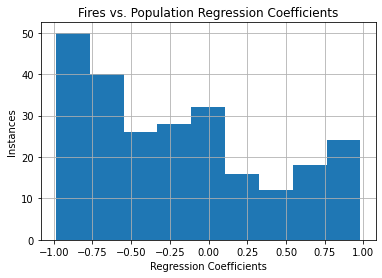

In [90]:
rng = rCoefs
a = np.hstack((rng,
               rng))
_ = plt.hist(a, bins='auto')
plt.title("Fires vs. Population Regression Coefficients")
plt.ylabel('Instances')
plt.xlabel('Regression Coefficients')
plt.grid()
plt.show()

In [127]:
# create a population density dataframe for analysis
popDens = minChg
popDens= popDens.drop(columns=['Country','Code','Pct','Area']).T
popDens.columns = minChgFires.iloc[:,:].columns
fireDens = minChgFires.iloc[:,:].astype('float')
popDens=popDens.divide(minChg.Area.astype('float').values, axis=1 )

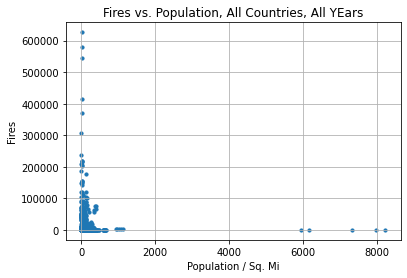

In [153]:
# Plot population density and fire counts of all of the data, and perform 1st and 2nd order regression
plt.scatter(popDens[popDens.iloc[0:,0:]<= 8000000000]   
            ,fireDens, marker='o',
            s = 10)
plt.title("Fires vs. Population, All Countries, All Years")
plt.ylabel('Fires')
plt.xlabel('Population / Sq. Mi')
plt.grid()


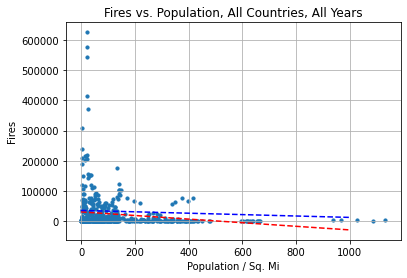

In [154]:
plt.scatter(popDens[popDens.iloc[0:,0:]<= 4000]   
            ,fireDens, marker='o',
            s = 10)
plt.title("Fires vs. Population, All Countries, All Years")
plt.ylabel('Fires')
plt.xlabel('Population / Sq. Mi')
plt.grid()
x = popDens[popDens.iloc[0:,0:]<= 4000].to_numpy().flatten()
y = fireDens.to_numpy().flatten()
idx = np.isfinite(x) & np.isfinite(y)
z = np.polyfit( x[idx],y[idx] , 1)
p = np.poly1d(z)
plt.plot(np.arange( min(x[idx]),max(x[idx]),1000, dtype=float), p(np.arange( min(x[idx]),max(x[idx]) , 1000, dtype=float)),"r--")
z2 = np.polyfit( x[idx],y[idx] , 2)
p2 = np.poly1d(z2)
plt.plot(np.arange( min(x[idx]),max(x[idx]),1000, dtype=float), p2(np.arange( min(x[idx]),max(x[idx]) , 1000, dtype=float)),"b--")

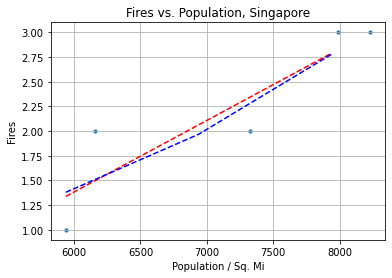

In [161]:
plt.scatter(popDens[popDens.iloc[0:,0:]>= 2000]   
            ,fireDens, marker='o',
            s = 10)
plt.title("Fires vs. Population, Singapore")
plt.ylabel('Fires')
plt.xlabel('Population / Sq. Mi')
plt.grid()
x = popDens[popDens.iloc[0:,0:]>= 2000].to_numpy().flatten()
y = fireDens.to_numpy().flatten()
idx = np.isfinite(x) & np.isfinite(y)
z = np.polyfit( x[idx],y[idx] , 1)
p = np.poly1d(z)
plt.plot(np.arange( min(x[idx]),max(x[idx]),1000, dtype=float), p(np.arange( min(x[idx]),max(x[idx]) , 1000, dtype=float)),"r--")
z2 = np.polyfit( x[idx],y[idx] , 2)
p2 = np.poly1d(z2)
plt.plot(np.arange( min(x[idx]),max(x[idx]),1000, dtype=float), p2(np.arange( min(x[idx]),max(x[idx]) , 1000, dtype=float)),"b--")

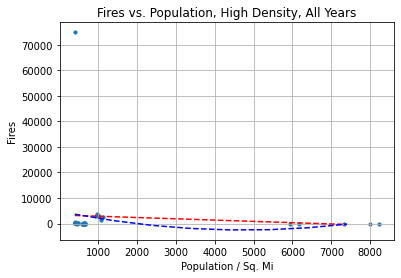

In [168]:
plt.scatter(popDens[popDens.iloc[0:,0:]> 400]   
            ,fireDens, marker='o',
            s = 10)
plt.title("Fires vs. Population, High Density, All Years")
plt.ylabel('Fires')
plt.xlabel('Population / Sq. Mi')
plt.grid()
x = popDens[popDens.iloc[0:,0:]> 400].to_numpy().flatten()
y = fireDens.to_numpy().flatten()
idx = np.isfinite(x) & np.isfinite(y)
z = np.polyfit( x[idx],y[idx] , 1)
p = np.poly1d(z)
plt.plot(np.arange( min(x[idx]),max(x[idx]),1000, dtype=float), p(np.arange( min(x[idx]),max(x[idx]) , 1000, dtype=float)),"r--")
z2 = np.polyfit( x[idx],y[idx] , 2)
p2 = np.poly1d(z2)
plt.plot(np.arange( min(x[idx]),max(x[idx]),1000, dtype=float), p2(np.arange( min(x[idx]),max(x[idx]) , 1000, dtype=float)),"b--")

In [157]:
popDens[popDens.iloc[0:,0:]>4000].dropna(axis=1)

Country,Singapore
2003,5937.699856
2005,6155.500722
2010,7325.731602
2015,7987.015873
2019,8230.258297


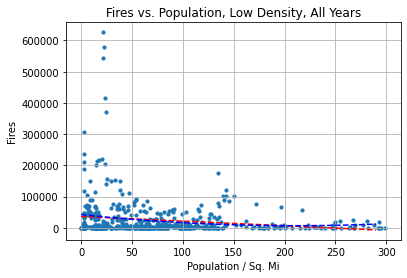

In [167]:
plt.scatter(popDens[popDens.iloc[0:,0:]< 300]   
            ,fireDens, marker='o',
            s = 10)
plt.title("Fires vs. Population, Low Density, All Years")
plt.ylabel('Fires')
plt.xlabel('Population / Sq. Mi')
plt.grid()
x = popDens[popDens.iloc[0:,0:]< 300].to_numpy().flatten()
y = fireDens.to_numpy().flatten()
idx = np.isfinite(x) & np.isfinite(y)
z = np.polyfit( x[idx],y[idx] , 1)
p = np.poly1d(z)
plt.plot(np.arange( min(x[idx]),max(x[idx]),10, dtype=float), p(np.arange( min(x[idx]),max(x[idx]) , 10, dtype=float)),"r--")
z2 = np.polyfit( x[idx],y[idx] , 2)
p2 = np.poly1d(z2)
plt.plot(np.arange( min(x[idx]),max(x[idx]),10, dtype=float), p2(np.arange( min(x[idx]),max(x[idx]) , 10, dtype=float)),"b--")